# Пересечение прямоугольника с множеством прямоугольников
## Постановка задачи
Рассмотрим следующую задачу: пусть дано множество прямоугольников, стороны которых параллельны осям координат. Также задается прямоугольник запроса. Нужно быстро определить, какие прямоугольники из множества пересекаются с прямоугольником запроса.

Более формально: дано множество прямоугольников $P = (p_1, p_2, ... ,p_n)$ и прямоугольник $q$. Необходимо найти $S = ( p \in P: p \cap q \neq \emptyset)$.

Разобъем множество $S$ на три множества-подзадачи: $S = A \cup B \cup C$

$$A = (p \in P: \exists i: p_i \in corners(p), p_i \in q)$$

$$B = (p \in P: \exists i: s_i \in sides(p), s_i \cap q \neq \emptyset)$$

$$C = (p \in P: \exists i: p_i \in corners(q), p_i \in p)$$

Иначе говоря, $A$ – это случай, когда $p$ целиком лежит в $q$, $B$ – когда $p$ и $q$ пересекаются, $C$ – когда $q$ целиком лежит в $p$. Разберем все три случая отдельно.

### Нахождение множества точек, попадающих в прямоугольник запроса

Для начала быстро рассмотрим одномерный случай. Быстро выдавать множество точек, попадающих в отрезок, можно с помощью сбалансированного дерева поиска. (Примечание: можно и с помощью отсортированного массива и бинпоиска, но в такую структуру данных нельзя эффективно вставить новую точку).

Как это делать - очевидно: идем вглубь дерева, пока не встретим узел, разделяющий концы отрезка. После этого ищем каждый конец отрезка в отдельности и добавляем к ответу все поддеревья, лежащие справа (для левого конца) и слева (для правого конца) от пути.

Такое дерево можно построить за $O(n log n)$, она будет занимать $O(n)$ памяти, запрос будет обра- ботан за $O(log n + k)$, где $k$ - величина ответа. Как расширить эту структуру на двумерный случай и добиться сопоставимых результатов?

### Способ 1. K-d tree

K-d дерево (short for k-dimensional tree) — статическая структура данных для хранения точек в k-мерном пространстве. Позволяет отвечать на запрос, какие точки лежат в данном прямоугольнике.
### Построение:
Строится это дерево следующим образом: разобьём все точки на плоскости вертикальной прямой так, чтобы слева (нестрого) и справа (строго) от неё было примерно поровну точек (для этого посчитаем медиану первых координат). Получим подмножества для левого и правого ребёнка. Далее построим для этих подмножеств деревья, но разбивать будем уже не вертикальной, а горизонтальной прямой (для этого посчитаем медиану вторых координат). И так далее (будем считать, что k = 2 (случай бОльших размерностей обрабатывается аналогично), поэтому на следующем уровне вновь будем разбивать вертикальными прямыми) пока в множестве больше 2-х точек.

<IPython.core.display.Javascript object>


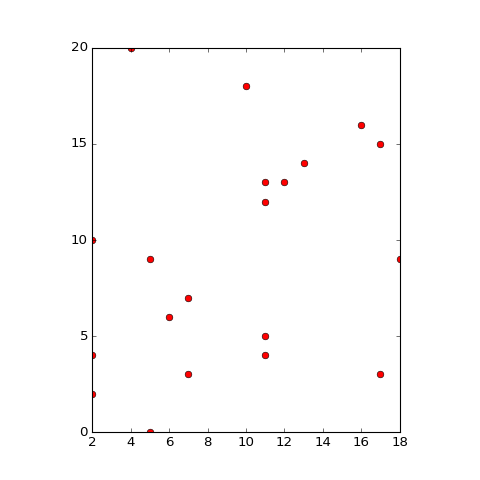

In [1]:
%matplotlib notebook
from build_visualizer import visualize
visualize()

##### Время построения: 
*Построение выполняется за $O(n \log n)$*.
<br>$\triangleright$<br>
<div style="padding-left:40px"> 
Время построения обозначим $T(n)$. Поиск медианы можно сделать за линейное время, поэтому достаточно очевидно, что:

$T(n) = O(1)$ if $n = 1$.

$T(n) = O(n) + 2 \cdot T(n / 2)$, otherwise.

Решением этого является $T(n) = O(n \log n)$.

Также стоит отметить, что можно и не искать медиану за линейное время, а просто посортить все точки в самом начале и дальше использовать это. В реализации попроще, асимптотика та же.</div>
$\triangleleft$

##### Занимаемая память:
*K-d дерево требует $O(n)$ памяти.*
<br>$\triangleright$<br>
<div style="padding-left:40px"> 
Высота дерева, очевидно, логарифмическая, а листьев всего $O(n)$. Поэтому будет $O(n)$ вершин, каждая занимает $O(1)$ памяти.</div>
$\triangleleft$

###  Запрос:

Пусть нам поступил какой-то прямоугольник $R$. Нужно вернуть все точки, которые в нём лежат. Будем это делать рекурсивно, получая на вход корень дерева и сам прямоугольник $R$. Обозначим область, соответствующую вершине v, как $region(v)$. Она будет прямоугольником, одна или более границ которого могут быть на бесконечности. $region(v)$ можно явно хранить в узлах, записав при построении, или же считать при рекурсивном спуске. Если корень дерева является листом, то просто проверяем одну точку и при необходимости репортим её. Если нет, то смотрим пересекают ли регионы детей прямоугольник $R$. Если да, то запускаемся рекурсивно от такого ребёнка. При этом, если регион полностью содержится в R, то можно репортить сразу все точки из него. Тем самым мы, очевидно, вернём все нужные точки и только их.

##### Время работы:
*Перечисление точек в прямоугольнике выполняется за $O(\sqrt n + ans)$, где $ans$ — размер ответа.*
<br>$\triangleright$<br><div style="padding-left:40px"> 
Сперва заметим, что все ReportSubtree суммарно выполняются за O(ans). Поэтому достаточно доказать оценку для числа рекурсивных вызовов. А рекурсивные вызовы выполняются только для тех вершин, регионы которых пересекают R, но не содержатся в нём. Такие регионы обязательно пересекают хотя бы одну (axis-parallel) сторону заданного прямоугольника. Оценим количество регионов, которые могут пересекаться произвольной вертикальной прямой. Для горизонтальной прямой это будет аналогично.

Обозначим максимально возможное количество регионов, пересекаемых какой-либо вертикальной прямой, в дереве для $n$ точек, у которого первое разбиение делается вертикальной прямой, как $Q(n)$. Рассмотрим произвольную вертикальную прямую $l$. Она будет пересекать регион корня и какого-то одного из его детей (например, левого). При этом ни один из регионов в другом (правом) поддереве пересекать она не может. Левая половина разбита ещё на 2 части горизонтальной прямой, в каждой из них примерно $n / 4$ вершин, и они хранятся в поддереве, у которого первое разбиение делается вертикальной прямой. Это даёт нам следующее соотношение:

$Q(n) = O(1)$ if $n = 1$.
$Q(n) = 2 + 2 \cdot Q(n / 4)$, otherwise.

Глубина дерева рекурсии равна: $\log_4 n = \frac{1}{2}\log_2 n$

Следовательно, $Q(n) = O(2^{\frac{1}{2}\log_2 n}) = O(\sqrt n)$ является решением. Принимая во внимание всё, что писалось выше, получаем требуемое.</div>
$\triangleleft$

### Способ 2. Range tree

### Построение:
Дадим следующее рекурсивное определение $range-tree$:
* Одномерное $range-tree$ — просто дерево поиска, описанное выше.
* $d$-мерное $range-tree$ — дерево поиска (по первой координате $X_1$), аналогичное описанному выше, но в каждой вершине дополнительно хранящее $d-1$-мерное $range-tree$ (по остальным координатам $X_2 \times \cdots \times X_d$) для множества элементов, являющихся листами поддерева этой вершины.

### Запрос:
Запрос на выдачу точек, принадлежащих некому прямоугольнику $R$, выполняется следующим образом:
Выполнить описанную в постоновке задачипроцедуру поиска элементов отрезка для проекции прямоугольника запроса на $X_1$.

При добавлении поддерева к ответу:
* Если текущая координата - последняя, выдать все листы поддерева в качестве ответа
* Если текущая координата - не последняя, перейти к сохраненному в корне поддерева range-tree по следующим координатам и повторить тот же алгоритм.

Таким образом, алгоритм сначала найдет по первой координате некоторый набор поддеревьев, потом выполнит поиск по второй координате внутри этих поддеревьев, и так далее.

##### Время работы:
*Перечисление точек в прямоугольнике выполняется за $O(\log^d n + ans)$, где ans - количество точек ответа.*
<br>$\triangleright$<br><div style="padding-left:40px"> 
Фаза алгоритма, обрабатывающая одну координату, может выдать $O(\log n)$ поддеревьев высотой $O(\log n)$, каждое из которых будет обработано фазой по следующей координате, и т.д. Таким образом, время запроса - $O(\log^d n + ans)$
</div>
$\triangleleft$

##### Занимаемая память
*Range-tree дерево требует $O(n)$ памяти.*
<br>$\triangleright$<br><div style="padding-left:40px"> 
Докажем по индукции оценку в $O(n \log^{d-1} n)$ для потребляемой памяти для структуры range-tree.
* $d = 1$: в одномерном случае range-tree является обычным деревом, оценка в O(n \log^0 n) = O(n) очевидна.
* $d > 1$: очевидно, что основным слагаемым в оценке потребляемой памяти будут не сами хранимые элементы, а range-tree меньшей размерности, хранимые в каждой вершине, которые по индукционному предположению занимают $O(n \log^{d-2} n)$ памяти. Просуммируем размеры этих range-tree (суммирование по расстоянию до вершины от корня): $\sum_{k=1}^{\log n} 2^k O(\frac{n}{2^k} \log^{d-2} \frac{n}{2^k}) = \sum_{k=1}^{\log n} O(n \log^{d-2} n) = O(n \log^{d-1} n)$. 
</div>
$\triangleleft$